In [11]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
# reading the data 

data = pd.read_csv("data.csv")

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking for null values and duplicates

In [20]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Obersvation: No Null and duplicates exists in the dataset

In [23]:
data.shape

(7043, 21)

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:

- Partner: whether the customer has a partner or not (Yes, No),
- Dependents: whether the customer has dependents or not (Yes, No),
- OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
- tenure: number of months the customer has stayed with the company,
- MonthlyCharges: the amount charged to the customer monthly,
- TotalCharges: the total amount charged to the customer.

There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [24]:
data.size

147903

In [25]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Totalcharges is given as object datatype but it is float datatype

In [27]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Basic Data Cleaning:
As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [35]:
data['TotalCharges'].dtype

dtype('O')

In [38]:
data['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [39]:
data['TotalCharges'].dtype

dtype('float64')

In [40]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [41]:
data.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [29]:
# Create a copy
df = data.copy()

In [43]:
data.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Feature distribution

We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

Numerical features distribution

* Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

In [44]:
data[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


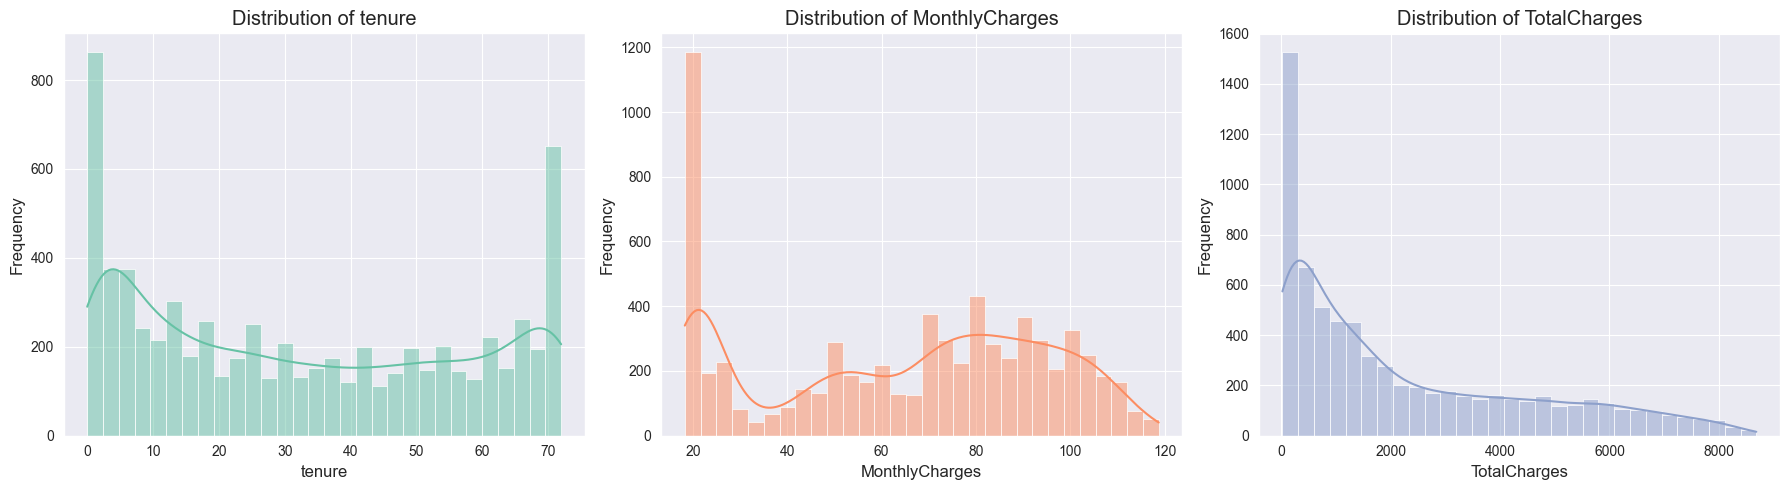

In [ ]:
sns.set_style("darkgrid")
colors = sns.color_palette("Set2", len(numerical_features))

# Create subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, bins=30, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**Tenure Distribution**

Observation: A large number of customers leave within the first few months, while a smaller group stays long-term (around 72 months).

Business Insight: 
This suggests a **critical churn window early in the customer lifecycle**. Improving **onboarding experience and engagement in the first 3–6 months** could significantly reduce early attrition.

**Monthly Charges Distribution**

Observation: There are two distinct peaks — one around **$20** and another between **$70–$100**, indicating customer clustering around basic and premium pricing tiers.

Business Insight: The current pricing structure may not fully serve mid-range customers. 

**Total Charges Distribution**

Observation: A majority of customers have low total charges, indicating short service durations, while fewer customers contribute high lifetime value.

Business Insight: To increase Customer Value, incentivize **loyalty programs, contract discounts, or bundling services** for at-risk customers.



array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

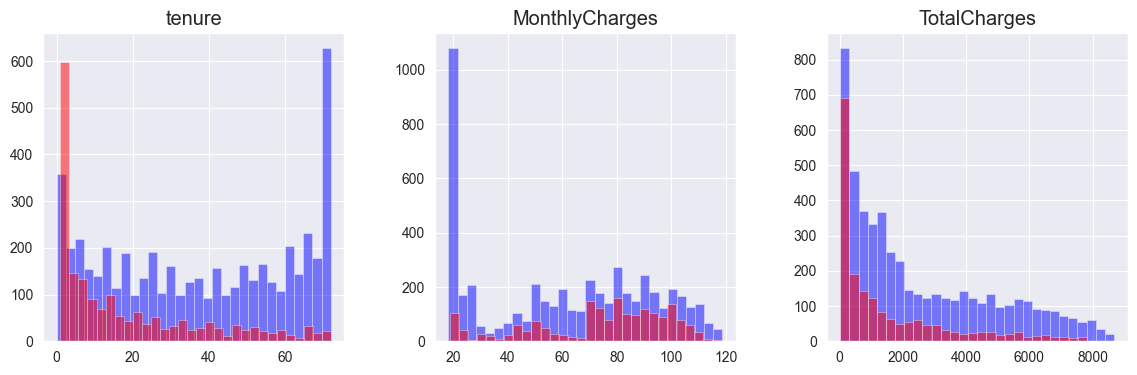

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
data[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
data[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

Observation

The churned customers (red bars) are highly concentrated at **low tenure**, **low total charges**, and **slightly higher monthly charges**, indicating that most customers tend to churn early in their lifecycle and before contributing significant value.  
This suggests a need for **early retention strategies** targeting new customers, especially those on higher-priced plans.


### Categorical feature distribution

To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

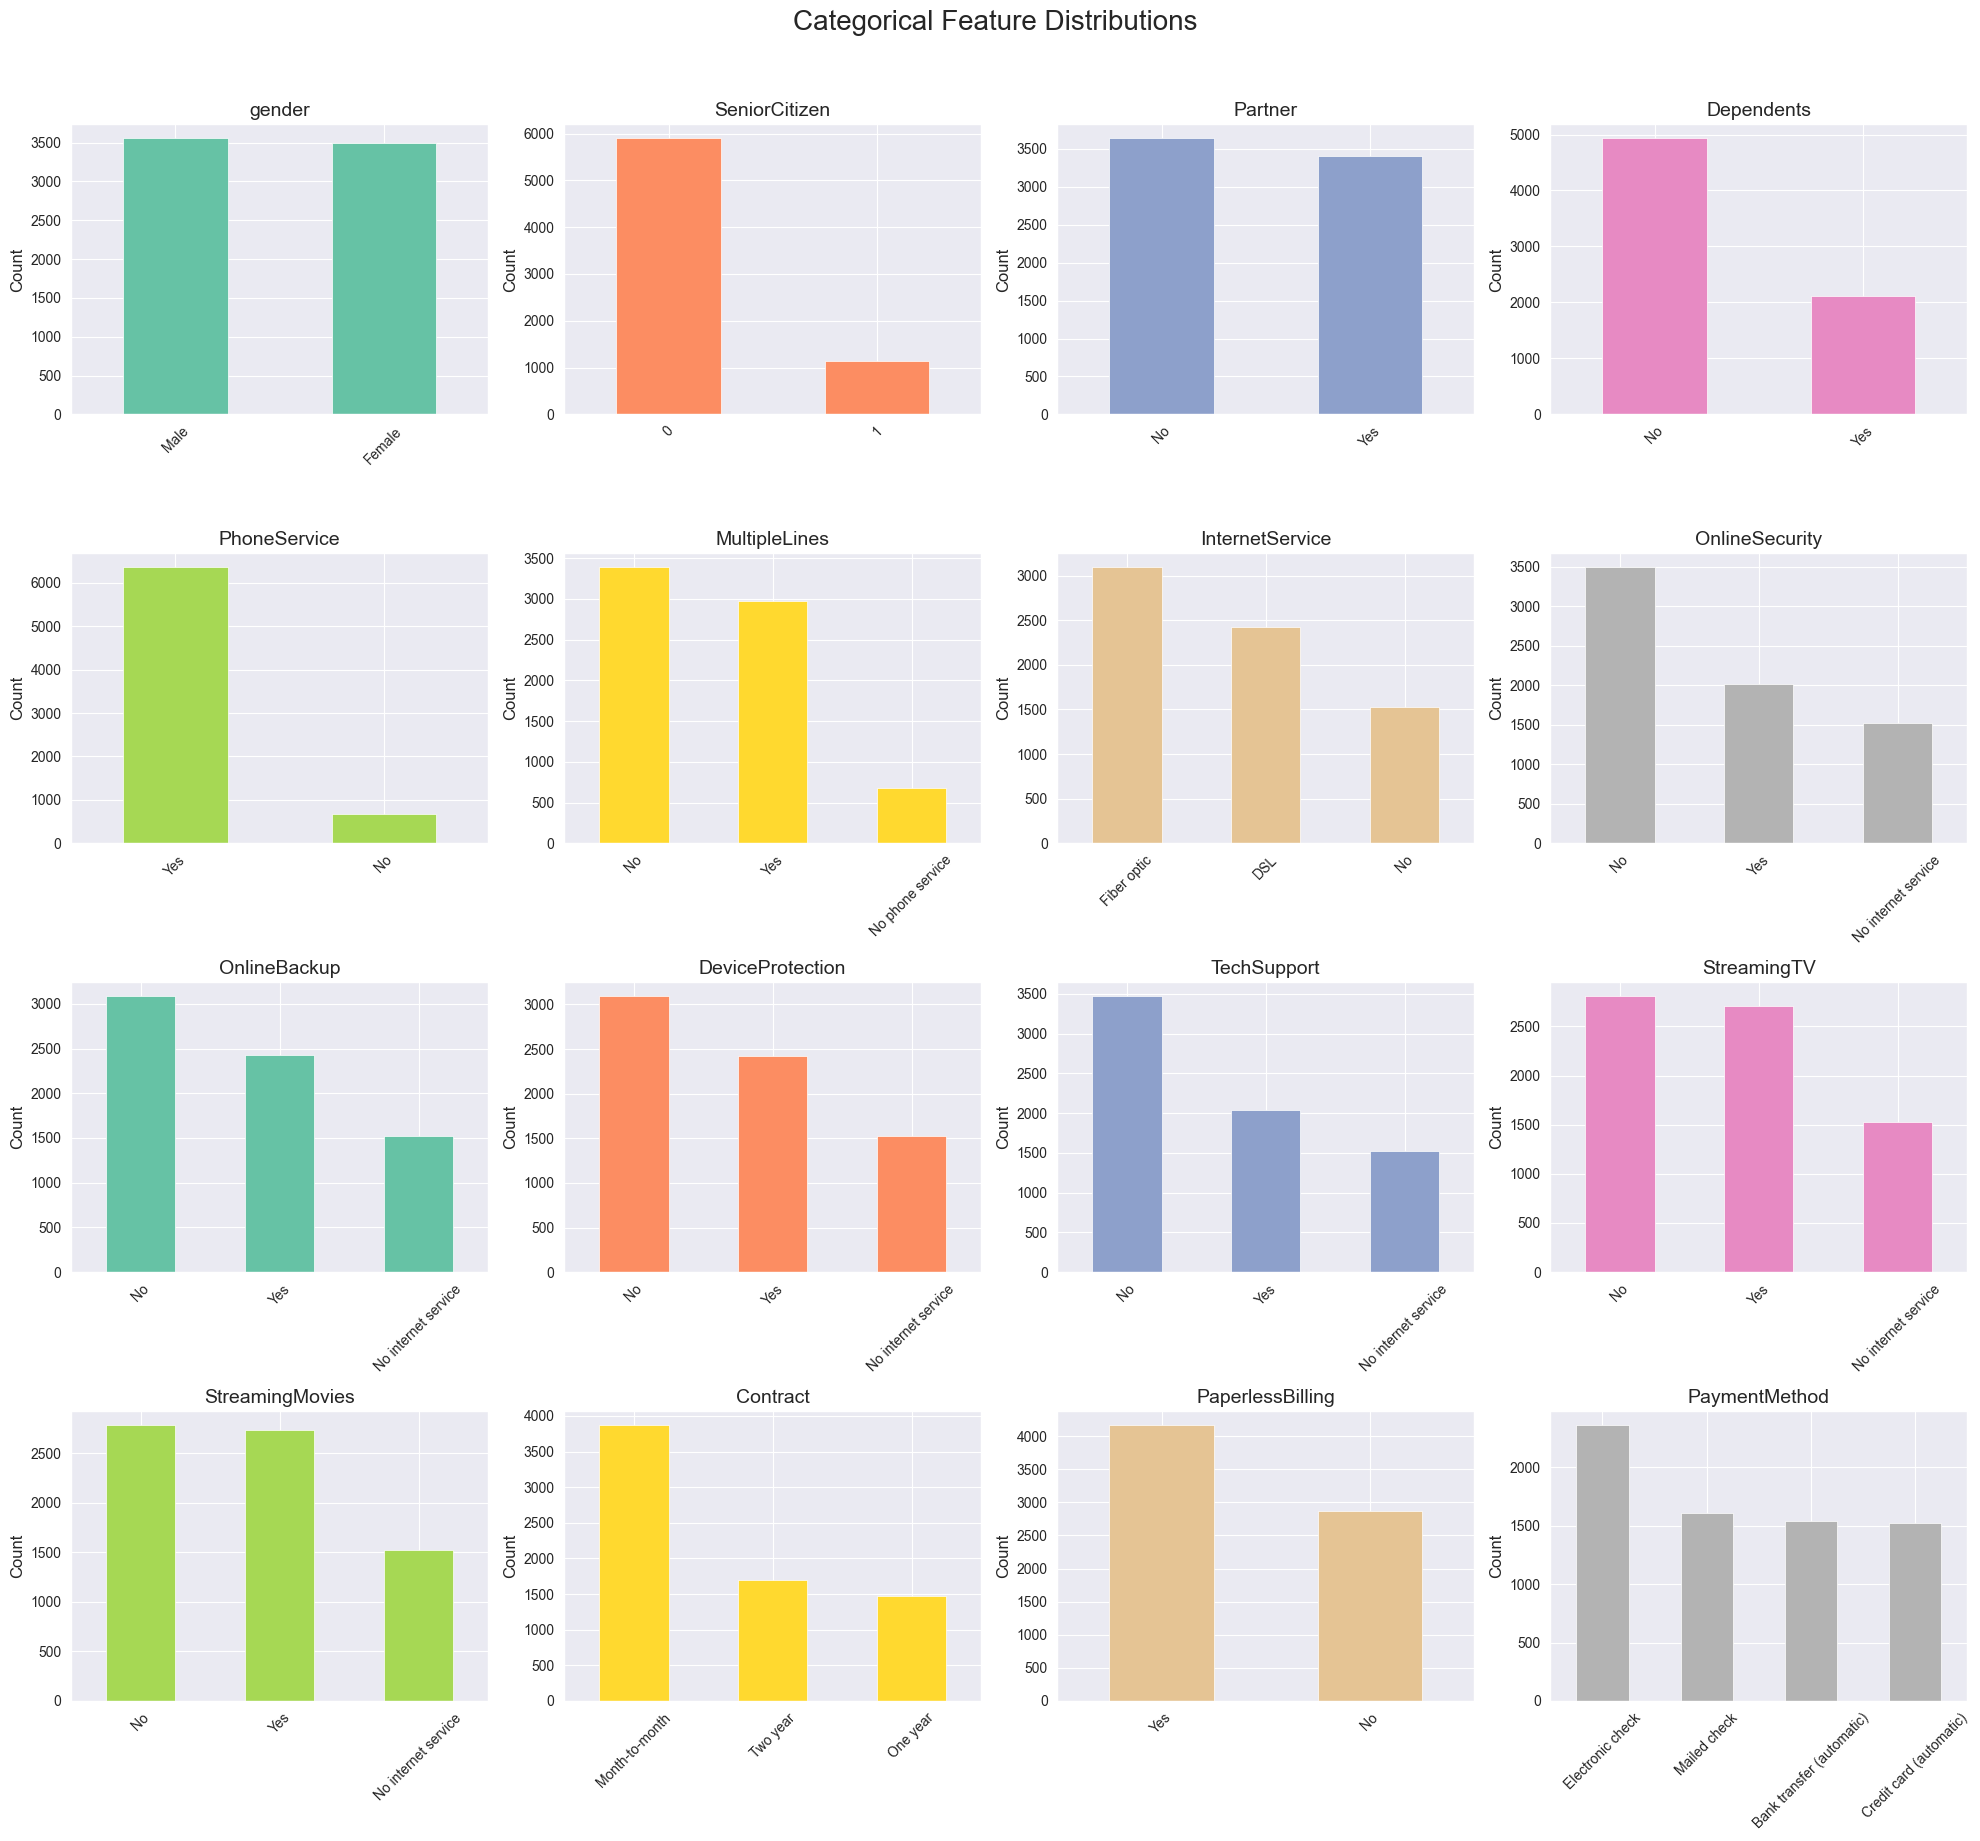

In [54]:
# Grid settings
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 18))
fig.suptitle('Categorical Feature Distributions', fontsize=20, y=1.02)

# Flatten the axes array for easier indexing
axes = ax.flatten()
colors = sns.color_palette("Set2", n_colors=len(categorical_features))

for i, feature in enumerate(categorical_features):
    data[feature].value_counts().plot(
        kind='bar',
        ax=axes[i],
        color=colors[i % len(colors)]
    )
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(len(categorical_features), ROWS * COLS):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation: 

- The dataset has a balanced gender split, but a majority of customers are **not senior citizens**, **do not have dependents**, and prefer **month-to-month contracts**.
- Services like **PhoneService**, **InternetService (Fiber optic)**, and **PaperlessBilling** are widely used.
- However, optional services such as **OnlineSecurity**, **TechSupport**, and **DeviceProtection** are underutilized.
- **Electronic check** is the most common payment method, which may correlate with higher churn based on past industry insights.

These patterns suggest opportunities to improve customer retention by **incentivizing value-added services**


The next step is to look at categorical features in relation to the target variable. We do this only for contract feature. Users who have a month-to-month contract are more likely to churn than users with long term contracts.

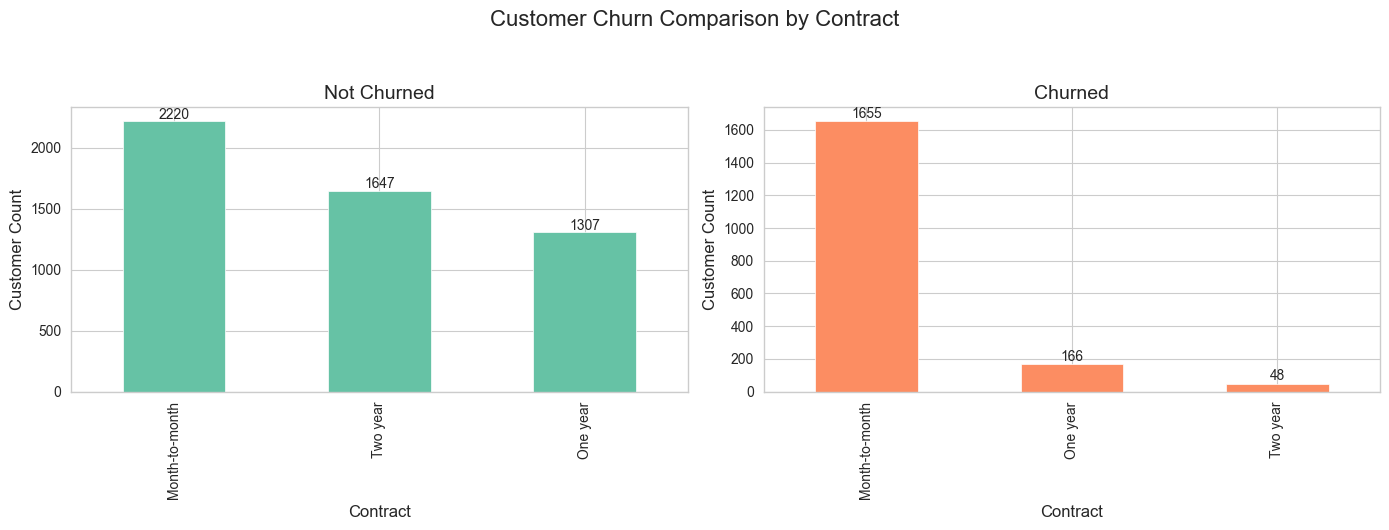

In [56]:
# Apply seaborn style
sns.set_style("whitegrid")
colors = ['#66c2a5', '#fc8d62']  # Green for no churn, Orange for churn

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Customer Churn Comparison by {feature}', fontsize=16, y=1.05)

# Plot for customers who did NOT churn
not_churned = data[data.Churn == "No"][feature].value_counts()
not_churned.plot(kind='bar', color=colors[0], ax=ax[0])
ax[0].set_title('Not Churned', fontsize=14)
ax[0].set_xlabel(feature)
ax[0].set_ylabel('Customer Count')
for i, val in enumerate(not_churned):
    ax[0].text(i, val + 20, str(val), ha='center', fontsize=10)

# Plot for customers who churned
churned = data[data.Churn == "Yes"][feature].value_counts()
churned.plot(kind='bar', color=colors[1], ax=ax[1])
ax[1].set_title('Churned', fontsize=14)
ax[1].set_xlabel(feature)
ax[1].set_ylabel('Customer Count')
for i, val in enumerate(churned):
    ax[1].text(i, val + 20, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Obersvation:

Customers with **month-to-month contracts** account for the **highest churn**, while those on **one-year and two-year contracts** are significantly more likely to stay, indicating that **long-term contracts are effective in improving customer retention**.


Target variable distribution

Text(0.5, 1.0, 'churned')

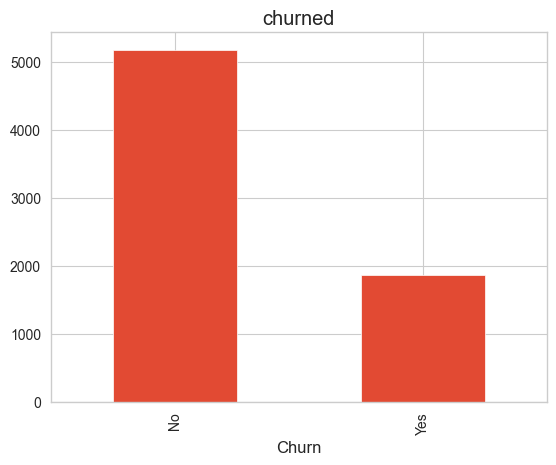

In [57]:
data[target].value_counts().plot(kind='bar').set_title('churned')

Obersvation:

The majority of customers **did not churn**, while a smaller but notable segment of customers **did churn**.  
This imbalance suggests that while churn is not the norm, there is still a significant opportunity to improve **customer retention strategies**


Few things we can do to minimize the influence of imbalanced dataset:

resample data,
collect more samples,
use precision and recall as accuracy metrics.

Outliers Analysis with IQR Method

In [59]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


Cleaning and Transforming Data

In [ ]:
data.drop(['customerID'],axis = 1,inplace = True)

In [63]:
# Dropped customerID because it is not needed

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Converting categorical variables into numberical values

In [92]:
data_1 = pd.get_dummies(
    data=data,
    columns=['gender', 'Partner', 'Dependents', 
             'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
             'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
    drop_first=True
)




In [95]:
# Convert only boolean columns
bool_cols = data_1.select_dtypes(include=['bool']).columns
data_1[bool_cols] = data_1[bool_cols].astype(int)


In [96]:
data_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [97]:
data_1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [98]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

data_1.TotalCharges = imputer.fit_transform(data_1["TotalCharges"].values.reshape(-1, 1))

Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
scaler.fit(data_1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(data_1.drop('Churn_Yes',axis = 1))

Feature Selection

In [101]:
X = scaled_features
Y = data_1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

Prediction using Logistic Regression

In [102]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [103]:
predLR = logmodel.predict(X_test)

In [104]:
predLR

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
Y_test

5616    0
2937    0
1355    0
5441    1
3333    0
       ..
2797    1
412     0
174     0
5761    0
5895    0
Name: Churn_Yes, Length: 2113, dtype: int64

In [106]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [107]:
logmodel.score(X_train, Y_train)


0.8064908722109534

In [108]:
accuracy_score(Y_test, predLR)


0.8002839564600095

In [109]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15508\3366304837.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


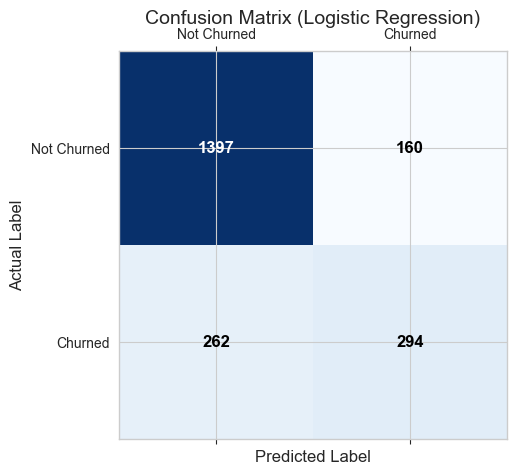

In [111]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test, predLR)

# Plot
plt.figure(figsize=(6, 5))
plt.matshow(cm, cmap='Blues', fignum=1)

# Add labels and title
plt.title("Confusion Matrix (Logistic Regression)", fontsize=14, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

# Tick labels
plt.xticks([0, 1], ["Not Churned", "Churned"], fontsize=10)
plt.yticks([0, 1], ["Not Churned", "Churned"], fontsize=10)

# Add value annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black',
                 fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### Confusion Matrix Observation (Logistic Regression)

- The model correctly identified **1,397 non-churned** and **294 churned** customers.
- It **misclassified 262 actual churned** customers as non-churned, and **160 non-churned** as churned.
- While the model performs well overall, it has a **higher false negative rate**, indicating room for improvement in detecting customers likely to churn.
- Business action: To prevent revenue loss, consider tuning the model threshold or using techniques like oversampling to better capture churn cases.
